In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

DATASET_PATH = "../data/plantvillage dataset/color"

In [3]:
classes = os.listdir(DATASET_PATH)

print("Number of classes:", len(classes))
print("Some classes:")
classes[:10]


Number of classes: 38
Some classes:


['Strawberry___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Blueberry___healthy',
 'Corn_(maize)___healthy',
 'Tomato___Target_Spot',
 'Peach___healthy',
 'Potato___Late_blight',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus']

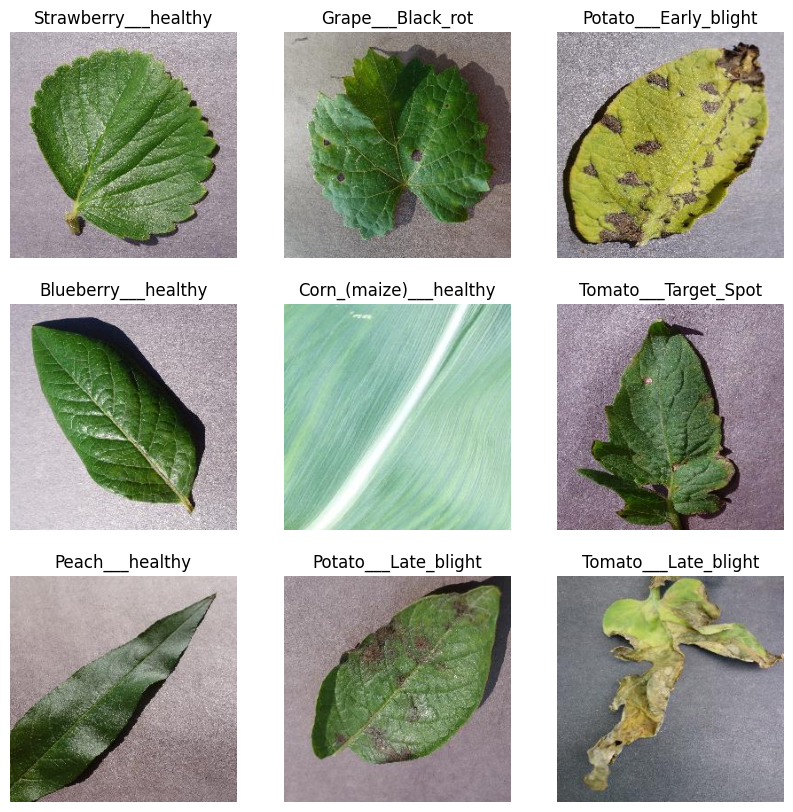

In [4]:
plt.figure(figsize=(10,10))

for i, cls in enumerate(classes[:9]):
    cls_path = os.path.join(DATASET_PATH, cls)
    img_name = os.listdir(cls_path)[0]
    img_path = os.path.join(cls_path, img_name)
    
    img = Image.open(img_path)
    
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


/Users/anishkakhurana25/Desktop/plant-disease-detection/venv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [6]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(38, activation="softmax")
])


/Users/anishkakhurana25/Desktop/plant-disease-detection/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,173,862 (42.62 MB)

 Trainable params: 11,173,862 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
EPOCHS = 5

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 751s 552ms/step - accuracy: 0.4768 - loss: 1.8964 - val_accuracy: 0.7631 - val_loss: 0.8165
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 716s 527ms/step - accuracy: 0.6756 - loss: 1.0734 - val_accuracy: 0.8397 - val_loss: 0.5454
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 721s 531ms/step - accuracy: 0.7298 - loss: 0.8709 - val_accuracy: 0.8596 - val_loss: 0.4532
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 688s 507ms/step - accuracy: 0.7701 - loss: 0.7169 - val_accuracy: 0.8743 - val_loss: 0.4028
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 720s 530ms/step - accuracy: 0.8018 - loss: 0.6127 - val_accuracy: 0.8900 - val_loss: 0.3439
